# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования**

1. Определить рыночную стоимость объектов недвижимости;

2. Построить автоматизированную  систему, которая отследит аномалии и мошенническую деятельность;

3. Установить, какие факторы влияют на ценообразование стоимости квартир

**Ход исследования**

Данные о недвижимости я получу из файла ''. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправит все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, мое исследование пройдет в семь этапов:
- Обзор данных;
- Предобработка данных;
- Расчеты и добавление результатов в таблицу;
- Проведение анализа для Ленинградской области;
- Проведение анализа для Санкт-Петербурга;
- Различаются ли факторы, которые влияют на ценообразование стоимости квартир;
- Написание общего вывода.

### Открытие файла с данными и изучение общей информации

**Импортирование библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Сохранение датафрейма в переменную data**

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Вывод первых строк и общей информации о таблице**

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Гистограмма всех числовых столбцов**

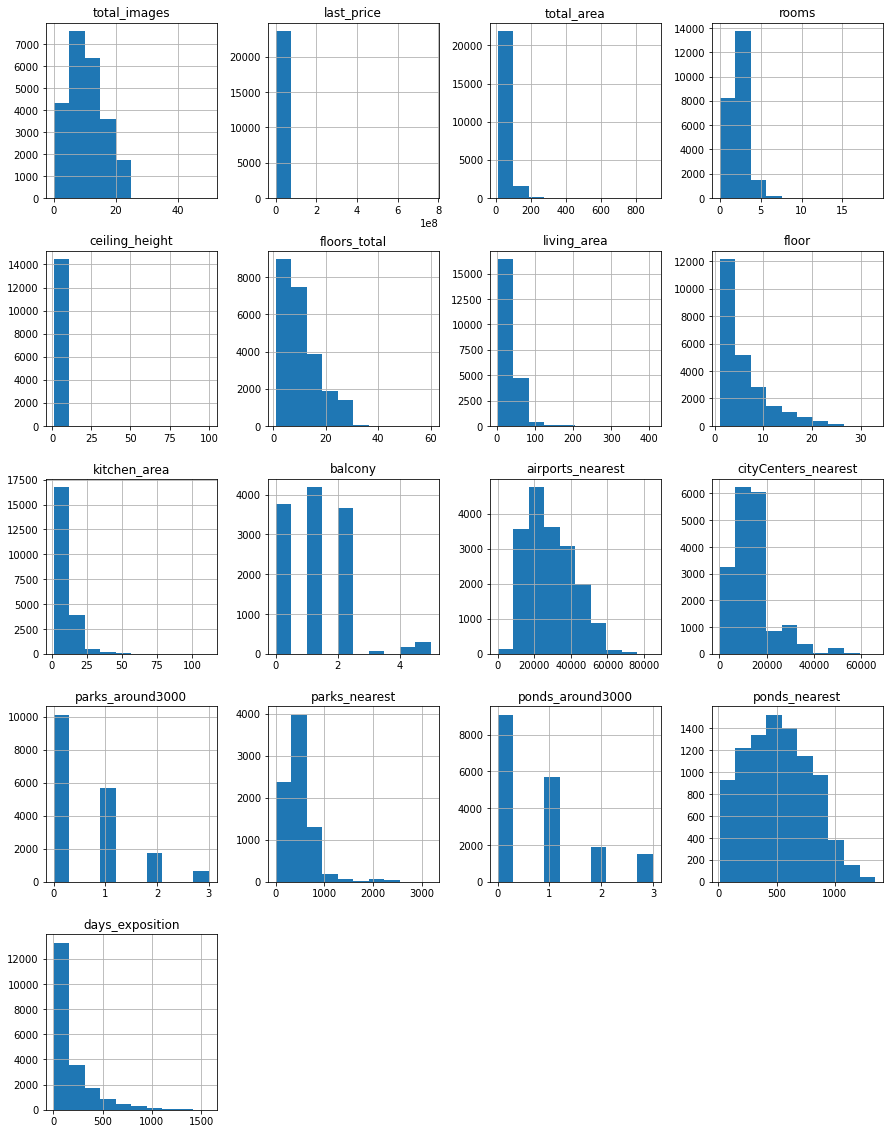

In [5]:
df.hist(figsize=(15, 20));

**Вывод:** В данных 23699 записи. Во многих столбцах есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения.

### Предобработка данных

**Количество пропусков в таблице в каждом столбце**

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Переименование столбца 'cityCenters_nearest' в соответствии с единым стилем заголовков таблицы**

In [8]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Приведение столбца 'last_price' к числовому типу данных**

In [11]:
df['last_price'].astype(int)

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

**Приведение значений стобца 'first_day_exposition' к типу 'datetime'**

In [12]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

**Количество пустых значений в столбце 'ceiling_height' и замена их на медианное**

In [14]:
df['ceiling_height'].isna().sum()

9195

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

*Поиск и устранений аномальных значений в столбце 'ceiling_height'*

In [16]:
df['ceiling_height'].sort_values(ascending=False).head(35)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
12628      5.3
1026       5.3
Name: ceiling_height, dtype: float64

*Перенос запятой влево на один знак у значений больше 20*

In [17]:
df.loc[df['ceiling_height'] > 20, 'ceiling_height'] = df['ceiling_height'] / 10

**Поиск и устранений пустых и аномальных значений в столбце 'floors_total'**

In [18]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [19]:
#df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

*Самый высокий жилой дом в Лен области - 37 этажей, поэтому всё, что выше заменяем на медианное значение*

In [20]:
#df.loc[df['floors_total'] > 37, 'floors_total'] = df['floors_total'].median()

In [21]:
df.loc[df['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [22]:
df.loc[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [23]:
max_floors = 37
mode_floors = df['floors_total'].mode()[0] #5

In [24]:
df['floors_total'].fillna(mode_floors, inplace=True)

In [25]:
df.loc[df['floors_total'] > max_floors, 'floors_total'] = mode_floors

In [26]:
df.loc[df['floor'] > df['floors_total'], 'floors_total'] = df['floor']

In [27]:
df.loc[df['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [28]:
df.loc[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


*Приводим значения в столбце к числовому типу*

In [29]:
#df['floors_total'] = df['floors_total'].astype(int)

In [30]:
df['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37.])

**Замена пустых значений в столбце 'is_apartment'**

In [31]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [32]:
df['is_apartment'].isna().sum()

20924

In [33]:
df['is_apartment'].mean()

0.018018018018018018

*1.8% - апартаменты. Вероятно, пропуски означают отсутвие апартаментов. Заменим пустые значения на False*

In [34]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [35]:
df['is_apartment'] = df['is_apartment'].astype(bool)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Скорее, если площадь кухни не указана, то ее просто нет. Поэтому заменим пустые значения на "0"**

In [37]:
df['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

In [38]:
df['kitchen_area'].isna().sum()

2278

In [39]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [40]:
df['kitchen_area'].isna().sum()

0

**Так же, как и с кухнями, если балконы не указаны, то скорее их нет**

In [41]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [42]:
df['balcony'].isna().sum()

11519

In [43]:
df['balcony'] = df['balcony'].fillna(0)

In [44]:
df['balcony'] = df['balcony'].astype(int)

In [45]:
df['balcony'].sort_values().value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

**Приведем все значения в столбце 'locality_name' к нижнему регистру и уберем часть перед населенным пунктом, если такая есть. Пустые значения заменим на 'unknown'**

In [46]:
df['locality_name'].isna().sum()

49

In [47]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [48]:
df['locality_name'] = df['locality_name'].str.lower()

In [49]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [50]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

*Убираем части перед названием населенного пункта*

In [51]:
df['locality_name'] = df['locality_name'].replace(
        ['городской поселок ', 'поселок при железнодорожной станции ', 'деревня ', 'коттеджный поселок ', 'поселок городского типа ', 'поселок станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'поселок ', 'село ', 'имени '], '', regex=True
)

In [52]:
df['locality_name'] = df['locality_name'].str.title()

In [53]:
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

*Заменим пустые значения на значения 'undefined'*

In [54]:
df['locality_name'] = df['locality_name'].fillna('undefined')

**Пустые значения в столбце 'airports_nearest' указывают, что аэропорта в городе нет, либо находится слишком далеко**

*Оставим данные без изменений*

In [55]:
df['airports_nearest'].sort_values().value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
7934.0      1
22121.0     1
45404.0     1
46385.0     1
0.0         1
Name: airports_nearest, Length: 8275, dtype: int64

In [56]:
df['airports_nearest'].isna().sum()

5542

In [57]:
df['airports_nearest'].fillna(0)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        0.0
23696        0.0
23697    39140.0
23698        0.0
Name: airports_nearest, Length: 23699, dtype: float64

In [58]:
df['airports_nearest'].isna().sum()

5542

In [59]:
df['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

**Столбец 'city_centers_nearest' показывает расстояние до центра города. Пустые значения указывают, что объект недвижимости находится не в городе**

*Оставим пустые значения без изменений*

**Пустые значения в столбце 'parks_around3000' указывают, что в таком радиусе нет парков. Заменим пропуски на '0'**

In [61]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [62]:
df['parks_around3000'].sort_values().unique()

array([0., 1., 2., 3.])

*Приведем столбец к целочисленному формату, потому что количество парков может быть только целым*

In [63]:
df['parks_around3000'] = df['parks_around3000'].astype(int)

In [64]:
df['parks_around3000'].sort_values().unique()

array([0, 1, 2, 3])

**Незаполненные пропуски в столбце 'parks_nearest' скорее всего, указывают, что объект продажи находится далеко от парка**

*Оставим значения неизменным*

In [65]:
df['parks_nearest'].sort_values().value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
67.0       1
828.0      1
1909.0     1
1049.0     1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [66]:
df['parks_nearest'].isna().sum()

15620

**Пустые значения в столбце 'ponds_around3000' указывают, что в таком радиусе нет водоемов. Заменим пропуски на '0'**

In [67]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [68]:
df['ponds_around3000'].sort_values().unique()

array([0., 1., 2., 3.])

*Приведем столбец к целочисленному формату, потому что количество водоемов может быть только целым*

In [69]:
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

In [70]:
df['ponds_around3000'].sort_values().unique()

array([0, 1, 2, 3])

**Незаполненные пропуски в столбце 'ponds_nearest' скорее всего, указывают, что объект продажи находится далеко от водоема**

*Оставим значения неизменным*

In [71]:
df['ponds_nearest'].sort_values().value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
947.0      1
1077.0     1
193.0      1
23.0       1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

In [72]:
df['ponds_nearest'].isna().sum()

14589

**Столбец 'days_expositions' показывает сколько дней было размещено объявление**

*Пустые значения означают, что объявление еще актуально. Оставим данные без изменений*

In [73]:
df['days_exposition'].isna().sum()

3181

In [74]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод:** в ходе предобработки данных были выполнены следующие задачи: 

- изменено название столбца в соответствии с общим стилем;
- заполнено пропуски где это возможно и необходимо;
- изменены типы данных в соответствии со значениями в столбцах.

In [75]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [76]:
df.duplicated().sum()

0

В ходе выполнения предобработки данных, были выполнены следующие действия:

- Переименован столбец 'cityCenters_nearest' на 'city_centers_nearest' в соответсвие с единым стилем столбцов датафрейма;

- Найдены пропуски в каждом столбце и предприняты действия по их устранению: замена на медианное значение, на "0", удаление или неизменение в заисимости от смысла столбца;

- Изменены типы данных значений некоторых столбцов.

### Добавление в таблицу новых столбцов

- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

**Добавим столбец 'price_square_meter' с ценой одного квадратного метра объекта с точностью до двух знаков после запятой**

In [77]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

**Добавим столбец 'day_publication' день недели публикации объявления (0 — пн, 1 — вт, ...)**

In [78]:
df['day_publication'] = df['first_day_exposition'].dt.weekday 
df['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

**Добавим столбец 'month_publication' месяц публикации объявления**

In [79]:
df['month_publication'] = df['first_day_exposition'].dt.month 
df['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

**Добавим столбец 'year_publication' год публикации объявления**

In [80]:
df['year_publication'] = df['first_day_exposition'].dt.year 
df['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

**Добавим столбец 'type_apartment_floor' тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [81]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['type_apartment_floor'] = df.apply(floor, axis=1) 
df['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**Добавим столбец 'distance_city_center' расстояние до центра города в километрах (переведём из м в км и округлим до ближайших целых значений)**

In [82]:
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)
df['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

**Вывод:** в таблицу добавлены  новые столбцы:
- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

### Исследовательский анализ данных

**Анализ общей площади**

In [83]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

*Выберем все квартиры от минимальной до максимальной общей площади*

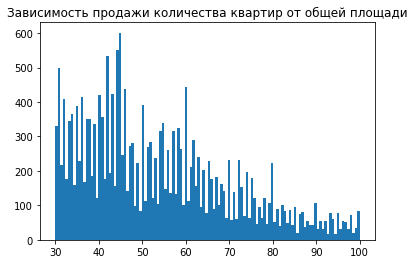

In [84]:
plt.hist(df['total_area'], bins=120, range=(30, 100))
plt.title('Зависимость продажи количества квартир от общей площади')
plt.show()

*Квартиры с площадью менее 30 и более 100 кв.м. можно не включать в гистограмму, т.к. их слишком мало*

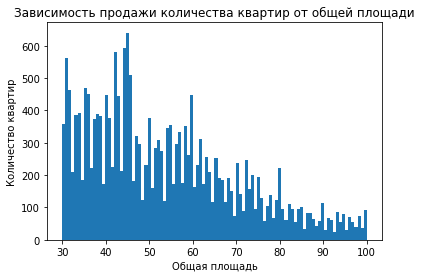

In [85]:
plt.hist(df['total_area'], bins=100, range=(30, 100))
plt.title('Зависимость продажи количества квартир от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** больше всего продают квартиры с общей площадью от 30 до 50 кв.м. Максимум около 47 кв.м.

**Анализ жилой площади**

In [86]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Выберем все квартиры от минимальной до максимальной жилой площади

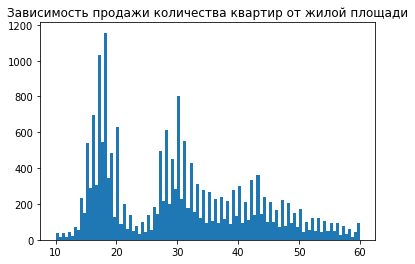

In [87]:
plt.hist(df['living_area'], bins=100, range=(10, 60))
plt.title('Зависимость продажи количества квартир от жилой площади')
plt.show()

*Квартиры с жилой площадью менеее 15 и более 50 кв.м. можно не включать в гистограмму, т.к. их слишком мало*

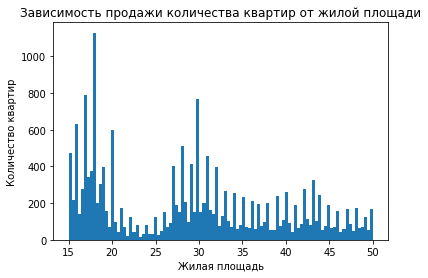

In [88]:
plt.hist(df['living_area'], bins=100, range=(15, 50))
plt.title('Зависимость продажи количества квартир от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** больше всего продают квартиры с жилой площадью около 18 кв.м. и 30 кв.м. Меньше всего - 23 кв.м.

**Анализ площади кухни**

In [89]:
df['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

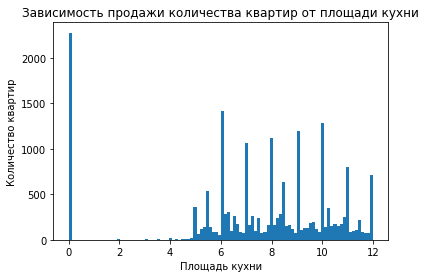

In [90]:
plt.hist(df['kitchen_area'], bins=100, range=(0, 12)) #Квартир с площадью кухни более 12 кв.м. слишком мало, поэтому их не смотрим
plt.title('Зависимость продажи количества квартир от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

*Гистограмма квартир с кухнями*

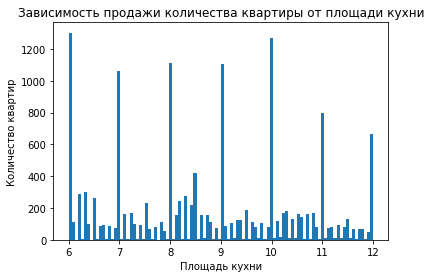

In [91]:
plt.hist(df['kitchen_area'], bins=100, range=(6, 12))
plt.title('Зависимость продажи количества квартиры от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** квартира без кухни - наиболее популярный вариант. Из остальных квартир, преобладают с площадями кухонь с целыми числами от 6 до 12, где 11 и 12 встречаются реже остальных.

**Анализ цены объектов**

In [92]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

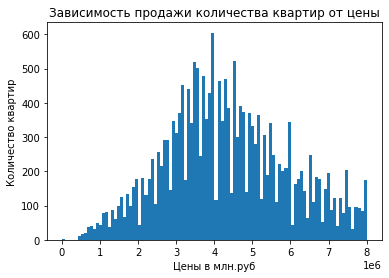

In [93]:
plt.hist(df['last_price'], bins=100, range=(1e+04,8e+06))
plt.title('Зависимость продажи количества квартир от цены')
plt.xlabel('Цены в млн.руб')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** наиболее частая цена на объекты недвижимости - от 3.5 до 4.5 млн.руб. Однако, есть ямы в гистограмме в точках 3.6, 4.0, 4.4 млн.руб.

**Анализ количества комнат**

In [94]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

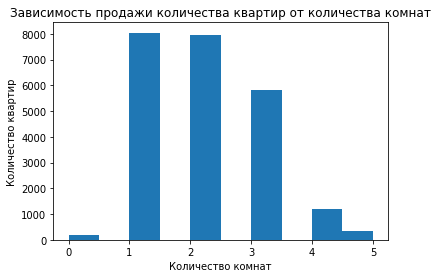

In [95]:
plt.hist(df['rooms'], bins=10, range=(0, 5))
plt.title('Зависимость продажи количества квартир от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** наиболее популярные квартиры - с одной, двумя и тремя комнатами

**Анализ высоты потолков**

In [96]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.699480
std          0.276991
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

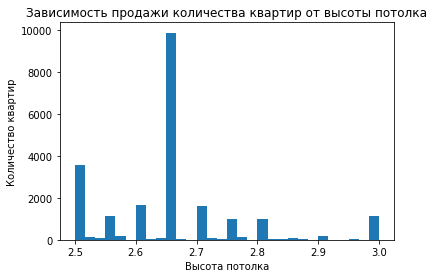

In [97]:
plt.hist(df['ceiling_height'], bins=30, range=(2.5, 3))
plt.title('Зависимость продажи количества квартир от высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** среди объявлений больше всего квартир с высотой потолка 2.65 метра, далее 2.5, 2.6, 2.7, 3.0, 2.8

**Анализ типа этажа квартиры («первый», «последний», «другой»)**

In [98]:
table_floor_price_median = df.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median')
table_floor_price_count = df.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='count')
table_floor_price_median

,last_price
type_apartment_floor,
другой,4850000.0
первый,3900000.0
последний,4350000.0


In [99]:
table_floor_price_sort = table_floor_price_median.sort_values(by='last_price', ascending=False)
table_floor_price_sort

,last_price
type_apartment_floor,
другой,4850000.0
последний,4350000.0
первый,3900000.0


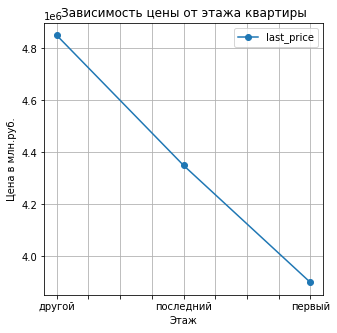

In [100]:
table_floor_price_sort.plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Цена в млн.руб.')
plt.show()

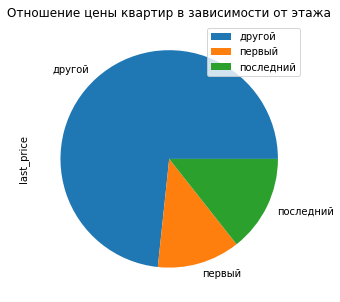

In [101]:
table_floor_price_count.plot.pie(subplots=True, figsize=(5,5))
plt.title('Отношение цены квартир в зависимости от этажа')
plt.show()

**Вывод:** квартиры на первом и последним этажах дешевле остальных. Количество квартир между первым и последним этажами составляет около 74% от общего количества.

**Анализ общего количества этажей в доме**

In [102]:
df['floors_total'].describe()

count    23699.000000
mean        10.669227
std          6.581212
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

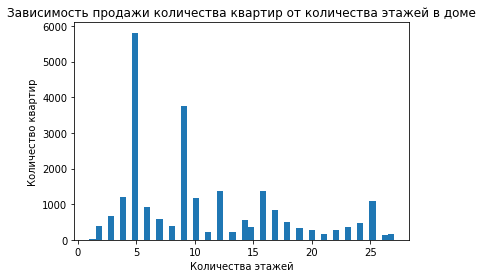

In [103]:
plt.hist(df['floors_total'], bins=50, range=(1, 27))
plt.title('Зависимость продажи количества квартир от количества этажей в доме')
plt.xlabel('Количества этажей')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** наиболее популярны продажи квартир в домах с 5 и 9 этажами

**Анализ расстояния до центра города в метрах**

In [104]:
df['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

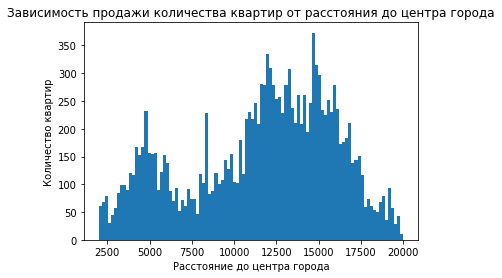

In [105]:
plt.hist(df['city_centers_nearest'], bins=100, range=(2000, 20000))
plt.title('Зависимость продажи количества квартир от расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** меньше всего предложений по продажам квартир до 3км, от 6.5км до 8км и от 17.5км от центра города. Больше всего - от 12км до 16км.

**Анализ расстояния до ближайшего парка**

In [106]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

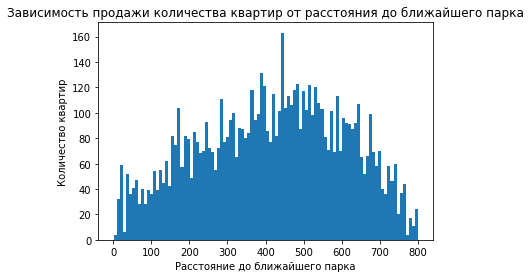

In [107]:
plt.hist(df['parks_nearest'], bins=100, range=(1, 800))
plt.title('Зависимость продажи количества квартир от расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** максимальное количество квартир расположены на расстоянии 450м от ближайшего парка. Но зависимости количества квартир от расстояния до ближайшего парка нет

**Задание 1** «Изучите, как быстро продавались квартиры (столбец days_exposition)»

In [108]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

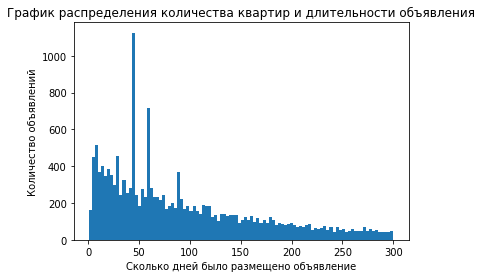

In [109]:
plt.hist(df['days_exposition'], bins=100, range=(1, 300))
plt.title('График распределения количества квартир и длительности объявления')
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:** среднее значение продажи составляет 180 дней, однако, медианное значение равняется 95. В данном случае медиана является более стабильным показателем, т.к. не учитывает выбросы.

Обычно продажа занимает 45 - 90 дней.

Быстрые объявления на отметке первого квартиля - 45 дней и меньше, необычно долгие - 232 дня и больше.

**Задание 2** «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта»

- общая площадь; (total_area)
- жилая площадь; (living_area)
- площадь кухни; (kitchen_area)
- количество комнат; (rooms)
- тип этажа, на котором расположена квартира (первый, последний, другой); (type_apartment_floor)
- дата размещения (день недели, месяц, год). (day_publication, month_publication, year_publication)

*Общая площадь*

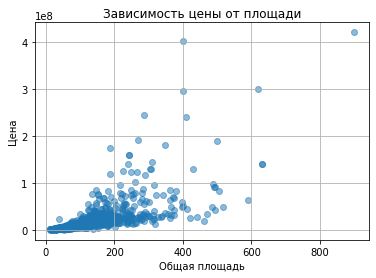

In [110]:
total_area_price = df.pivot_table(index='total_area', values='last_price')
plt.scatter(total_area_price.index, total_area_price.values, alpha=0.5)
plt.grid(True)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади')
plt.show()

In [111]:
corr = df.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area','rooms','day_publication', 'type_apartment_floor', 'month_publication','year_publication']).corr()
corr

,day_publication,kitchen_area,living_area,month_publication,rooms,total_area,year_publication
day_publication,1.000000,-0.029329,-0.002105,0.043692,-0.026511,0.002826,-0.032316
kitchen_area,-0.029329,1.000000,0.528068,-0.051245,0.418197,0.559274,-0.111815
living_area,-0.002105,0.528068,1.000000,0.018266,0.849326,0.954602,-0.090664
month_publication,0.043692,-0.051245,0.018266,1.000000,0.007960,0.013752,-0.269636
rooms,-0.026511,0.418197,0.849326,0.007960,1.000000,0.784052,-0.087252
total_area,0.002826,0.559274,0.954602,0.013752,0.784052,1.000000,-0.112573
year_publication,-0.032316,-0.111815,-0.090664,-0.269636,-0.087252,-0.112573,1.000000


In [112]:
corr = df[['last_price', 'total_area','living_area','kitchen_area','rooms','day_publication', 'type_apartment_floor', 'month_publication','year_publication']].corr()
corr

,last_price,total_area,living_area,kitchen_area,rooms,day_publication,month_publication,year_publication
last_price,1.000000,0.653675,0.566492,0.386444,0.363343,0.001550,0.002779,-0.043089
total_area,0.653675,1.000000,0.939537,0.514270,0.758344,-0.004695,0.004920,-0.079912
living_area,0.566492,0.939537,1.000000,0.409323,0.845977,-0.005605,-0.002483,-0.072696
kitchen_area,0.386444,0.514270,0.409323,1.000000,0.256087,-0.022952,0.009253,-0.056683
rooms,0.363343,0.758344,0.845977,0.256087,1.000000,-0.004134,-0.004469,-0.055418
day_publication,0.001550,-0.004695,-0.005605,-0.022952,-0.004134,1.000000,0.011496,-0.004799
month_publication,0.002779,0.004920,-0.002483,0.009253,-0.004469,0.011496,1.000000,-0.269642
year_publication,-0.043089,-0.079912,-0.072696,-0.056683,-0.055418,-0.004799,-0.269642,1.000000


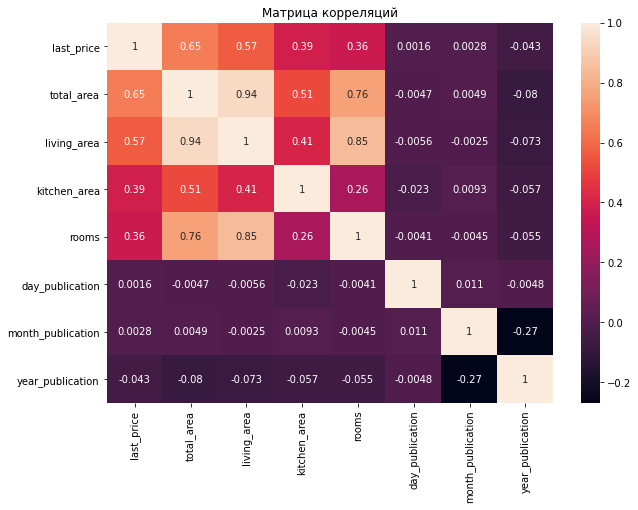

In [113]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True)
plt.title('Матрица корреляций')
plt.show()

*Зависимость цены от общей площади*

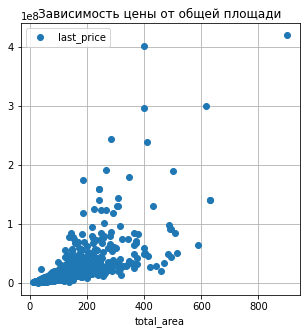

In [115]:
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5,5))
plt.title('Зависимость цены от общей площади')
plt.show()

*Зависимость цены от жилой площади*

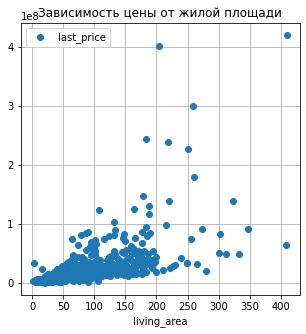

In [116]:
df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5,5))
plt.title('Зависимость цены от жилой площади')
plt.show()

*Зависимость цены от площади кухни*

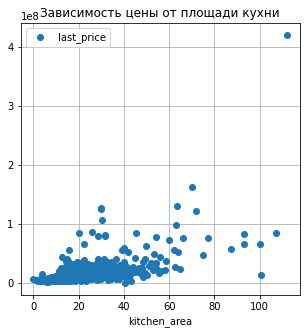

In [117]:
df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5,5))
plt.title('Зависимость цены от площади кухни')
plt.show()

*Зависимость цены от количества комнат*

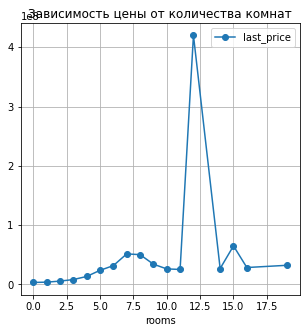

In [118]:
df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от количества комнат')
plt.show()

*Зависимость цены от этажа расположения*

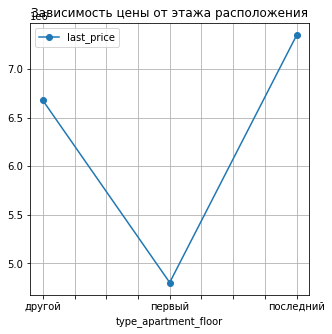

In [119]:
df.pivot_table(index='type_apartment_floor', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от этажа расположения')
plt.show()

*Зависимость цены от дня публикации*

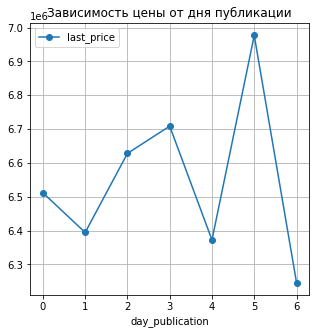

In [120]:
df.pivot_table(index='day_publication', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от дня публикации')
plt.show()

*Зависимость цены от месяца публикации*

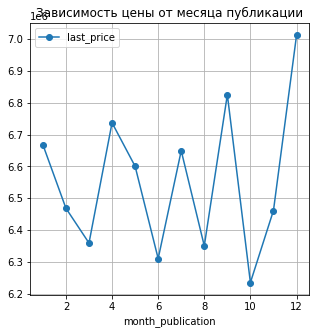

In [121]:
df.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от месяца публикации')
plt.show()

*Зависимость цены от года публикации*

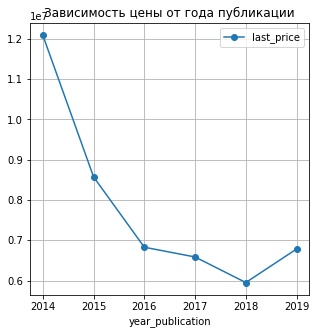

In [122]:
df.pivot_table(index='year_publication', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от года публикации')
plt.show()

**Вывод:**
- чем больше общая площадь, тем выше стоимость;
- чем больше комнат, тем больше жилая площадь, тем выше стоимость;
- квартиры на первом и последнем этажах значительно дешевле остальных.

**Задание 3** «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
- выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [123]:
avg_price_sm = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
avg_price_sm.columns = ['count']
avg_price_sm = avg_price_sm.sort_values(by='count', ascending=False).head(10)
avg_price_sm['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter', aggfunc='median')
avg_price_sm.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
Санкт-Петербург,15721,104761.900
Пушкин,369,100000.000
Кудрово,472,95675.475
Парголово,327,91642.860
Мурино,590,86175.640
Шушары,440,76876.175
Колпино,338,74723.745
Гатчина,307,67796.610
Всеволожск,398,65789.470


**Вывод:** самая высокая цена одного квадратного метра в Санкт-Петербурге, далее с небольшим отрывом следует г.Пушкин, который входит в состав г.Санкт-Петербург, как и следующие 5 населенных пунктов. 3 последних города с наименьшей стомостью одного квадратного метра - Гатчина, Всеволожск, Выборг, уже находятся в Лен.области

**Задание 4** «Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра»:
- учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
- описано, как стоимость объекта зависит от расстояния до центра города;
- построен график изменения средней цены для каждого километра от центра Петербурга.

In [124]:
df.query('locality_name == "Санкт-Петербург"')['distance_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

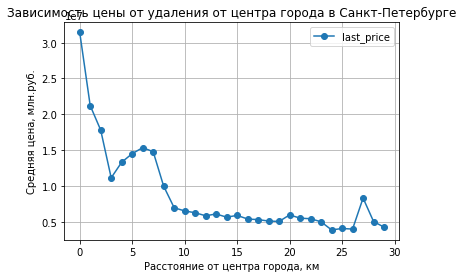

In [125]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_city_center', values='last_price').plot(grid=True, style='o-')
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города, км')
plt.ylabel('Средняя цена, млн.руб.')
plt.show()

In [126]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(values='last_price', index='distance_city_center')

,last_price
distance_city_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


**Вывод:** самые дорогие квартиры в центре города и их стоимость уменьшается с увеличением расстояния от центра до 12 км, далее стоимость примерно одинаковая. На расстоянии 2-3 км есть сильно дешевые квартиры, возможно, это комнаты или маленькие студии.

**ОБЩИЙ ВЫВОД:** 

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:

1. Изучена общая информация:
- пропущенные значения заполнены и некорректные типы данных и аномальные значения в столбцах исправлены


2. Выполнена предобработка данных:
- изменено название столбца в соответствии с общим стилем (cityCenters_nearest на city_centers_nearest);
- заполнено пропуски где это возможно и необходимо;
- изменены типы данных в соответствии со значениями в столбцах.


3. В таблицу добавлены  новые столбцы:
- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.


4. Проведен исследовательский анализ данных.

*Сделаны следующие выводы:*

- больше всего продают квартиры с общей площадью от 30 до 50 кв.м. Максимум около 47 кв.м.;
- больше всего продают квартиры с жилой площадью около 18 кв.м. и 30 кв.м. Меньше всего - 23 кв.м.;
- квартира без кухни - наиболее популярный вариант. Из остальных квартир, преобладают с площадями кухонь с целыми числами от 6 до 12, где 11 и 12 встречаются реже остальных.;
- наиболее частая цена на объекты недвижимости - от 3.5 до 4.5 млн.руб. Однако, есть ямы в гистограмме в точках 3.6, 4.0, 4.4 млн.руб.;
- наиболее популярные квартиры - с одной, двумя и тремя комнатами;
- среди объявлений больше всего квартир с высотой потолка 2.65 метра, далее 2.5, 2.6, 2.7, 3.0, 2.8;
- квартиры на первом и последним этажах дешевле остальных. Количество квартир между первым и последним этажами составляет около 74% от общего количества;
- наиболее популярны продажи квартир в домах с 5 и 9 этажами;
- меньше всего предложений по продажам квартир до 3км, от 6.5км до 8км и от 17.5км от центра города. Больше всего - от 12км до 16км.;
- максимальное количество квартир расположены на расстоянии 450м от ближайшего парка. Но зависимости количества квартир от расстояния до ближайшего парка нет;


Выполнены дополнительные задания и сделаны выводы:


1. «Изучите, как быстро продавались квартиры (столбец days_exposition)»

*Вывод:* 
- среднее значение продажи составляет 180 дней, однако, медианное значение равняется 95. В данном случае медиана является более стабильным показателем, т.к. не учитывает выбросы


2. «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта»

*Вывод:*
- чем больше общая площадь, тем выше стоимость;
- чем больше комнат, тем больше жилая площадь, тем выше стоимость;
- квартиры на первом и последнем этажах значительно дешевле остальных.


3. «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:

*Вывод:*

- самая высокая цена одного квадратного метра в Санкт-Петербурге, далее с небольшим отрывом следует г.Пушкин, который входит в состав г.Санкт-Петербург, как и следующие 5 населенных пунктов. 3 последних города с наименьшей стомостью одного квадратного метра - Гатчина, Всеволожск, Выборг, уже находятся в Лен.области


4. «Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра»:

*Вывод:*
Самые дорогие квартиры в центре города и их стоимость уменьшается с увеличением расстояния от центра до 12 км, далее стоимость примерно одинаковая. На расстоянии 2-3 км есть сильно дешевые квартиры, возможно, это комнаты или маленькие студии.
